In [1]:
import requests
from requests.auth import HTTPBasicAuth
import astropy.table as at
import matplotlib
from matplotlib.transforms import Bbox
from matplotlib.backends.backend_pdf import PdfPages
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import astropy.units as u
from astropy.visualization import PercentileInterval, AsinhStretch
from astroquery.mast import Catalogs
from astroquery.sdss import SDSS
from astroquery.simbad import Simbad

import light_curve as lc
from itertools import chain
import light_curve as lc
from astropy.table import MaskedColumn

from PIL import Image
import os
import sys
import shutil
import glob
import json

import math

import warnings
warnings.filterwarnings("ignore")

import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import os
import sys
import annoy
from annoy import AnnoyIndex
import random



from IPython.display import display_markdown

from collections import Counter

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import cKDTree
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

from alerce.core import Alerce
alerce = Alerce()

import antares_client

df_path = "/Users/patrickaleo/Desktop/Illinois/LAISS-antares/repo/figures/CVAE/SMOTE_train_test_70-30_min14_kneighbors8/256_epochs=250_latent_dim=3_10000xClassLoss/dataframes"

plt.style.use('fig_publication.mplstyle')
%config InlineBackend.figure_format = 'retina'  #for MacOS, make plots crisp


In [2]:
feature_names_hostgal = [
#  'Unnamed: 0',
#  'level_0',
#  'index',
#  'objName',
#  'objAltName1',
#  'objAltName2',
#  'objAltName3',
#  'objID',
#  'uniquePspsOBid',
#  'ippObjID',
#  'surveyID',
#  'htmID',
#  'zoneID',
#  'tessID',
#  'projectionID',
#  'skyCellID',
#  'randomID',
#  'batchID',
#  'dvoRegionID',
#  'processingVersion',
#  'objInfoFlag',
#  'qualityFlag',
#  'raStack',
#  'decStack',
#  'raStackErr',
#  'decStackErr',
#  'raMean',
#  'decMean',
#  'raMeanErr',
#  'decMeanErr',
#  'epochMean',
#  'posMeanChisq',
#  'cx',
#  'cy',
#  'cz',
#  'lambda',
#  'beta',
#  'l',
#  'b',
#  'nStackObjectRows',
#  'nStackDetections',
#  'nDetections',
#  'ng',
#  'nr',
#  'ni',
#  'nz',
#  'ny',
#  'uniquePspsSTid',
#  'primaryDetection',
#  'bestDetection',
#  'gippDetectID',
#  'gstackDetectID',
#  'gstackImageID',
#  'gra',
#  'gdec',
#  'graErr',
#  'gdecErr',
#  'gEpoch',
#  'gPSFMag',
#  'gPSFMagErr',
#  'gApMag',
#  'gApMagErr',
#  'gKronMag',
#  'gKronMagErr',
#  'ginfoFlag',
#  'ginfoFlag2',
#  'ginfoFlag3',
#  'gnFrames',
#  'gxPos',
#  'gyPos',
#  'gxPosErr',
#  'gyPosErr',
#  'gpsfMajorFWHM',
#  'gpsfMinorFWHM',
#  'gpsfTheta',
#  'gpsfCore',
#  'gpsfLikelihood',
#  'gpsfQf',
#  'gpsfQfPerfect',
#  'gpsfChiSq',
 'gmomentXX',
 'gmomentXY',
 'gmomentYY',
 'gmomentR1',
 'gmomentRH',
 'gPSFFlux',
#  'gPSFFluxErr',
 'gApFlux',
#  'gApFluxErr',
#  'gApFillFac',
#  'gApRadius',
 'gKronFlux',
#  'gKronFluxErr',
 'gKronRad',
#  'gexpTime',
 'gExtNSigma',
#  'gsky',
#  'gskyErr',
#  'gzp',
#  'gPlateScale',
#  'rippDetectID',
#  'rstackDetectID',
#  'rstackImageID',
#  'rra',
#  'rdec',
#  'rraErr',
#  'rdecErr',
#  'rEpoch',
# 'rPSFMag',
#  'rPSFMagErr',
# 'rApMag',
#  'rApMagErr',
# 'rKronMag',
#  'rKronMagErr',
#  'rinfoFlag',
#  'rinfoFlag2',
#  'rinfoFlag3',
#  'rnFrames',
#  'rxPos',
#  'ryPos',
#  'rxPosErr',
#  'ryPosErr',
#  'rpsfMajorFWHM',
#  'rpsfMinorFWHM',
#  'rpsfTheta',
#  'rpsfCore',
#  'rpsfLikelihood',
#  'rpsfQf',
#  'rpsfQfPerfect',
#  'rpsfChiSq',
 'rmomentXX',
 'rmomentXY',
 'rmomentYY',
 'rmomentR1',
 'rmomentRH',
'rPSFFlux',
#  'rPSFFluxErr',
'rApFlux',
#  'rApFluxErr',
#  'rApFillFac',
# 'rApRadius',
'rKronFlux',
#  'rKronFluxErr',
'rKronRad',
#  'rexpTime',
 'rExtNSigma',
#  'rsky',
#  'rskyErr',
#  'rzp',
#  'rPlateScale',
#  'iippDetectID',
#  'istackDetectID',
#  'istackImageID',
#  'ira',
#  'idec',
#  'iraErr',
#  'idecErr',
#  'iEpoch',
#  'iPSFMag',
#  'iPSFMagErr',
#  'iApMag',
#  'iApMagErr',
#  'iKronMag',
#  'iKronMagErr',
#  'iinfoFlag',
#  'iinfoFlag2',
#  'iinfoFlag3',
#  'inFrames',
#  'ixPos',
#  'iyPos',
#  'ixPosErr',
#  'iyPosErr',
#  'ipsfMajorFWHM',
#  'ipsfMinorFWHM',
#  'ipsfTheta',
#  'ipsfCore',
#  'ipsfLikelihood',
#  'ipsfQf',
#  'ipsfQfPerfect',
#  'ipsfChiSq',
  'imomentXX',
 'imomentXY',
 'imomentYY',
 'imomentR1',
 'imomentRH',
 'iPSFFlux',
#  'iPSFFluxErr',
 'iApFlux',
#  'iApFluxErr',
#  'iApFillFac',
#  'iApRadius',
 'iKronFlux',
#  'iKronFluxErr',
 'iKronRad',
#  'iexpTime',
  'iExtNSigma',
#  'isky',
#  'iskyErr',
#  'izp',
#  'iPlateScale',
#  'zippDetectID',
#  'zstackDetectID',
#  'zstackImageID',
#  'zra',
#  'zdec',
#  'zraErr',
#  'zdecErr',
#  'zEpoch',
#  'zPSFMag',
#  'zPSFMagErr',
#  'zApMag',
#  'zApMagErr',
#  'zKronMag',
#  'zKronMagErr',
#  'zinfoFlag',
#  'zinfoFlag2',
#  'zinfoFlag3',
#  'znFrames',
#  'zxPos',
#  'zyPos',
#  'zxPosErr',
#  'zyPosErr',
#  'zpsfMajorFWHM',
#  'zpsfMinorFWHM',
#  'zpsfTheta',
#  'zpsfCore',
#  'zpsfLikelihood',
#  'zpsfQf',
#  'zpsfQfPerfect',
#  'zpsfChiSq',
  'zmomentXX',
 'zmomentXY',
 'zmomentYY',
 'zmomentR1',
 'zmomentRH',
 'zPSFFlux',
# #  'zPSFFluxErr',
 'zApFlux',
# #  'zApFluxErr',
# #  'zApFillFac',
# #  'zApRadius',
 'zKronFlux',
# #  'zKronFluxErr',
 'zKronRad',
# #  'zexpTime',
  'zExtNSigma',
#  'zsky',
#  'zskyErr',
#  'zzp',
#  'zPlateScale',
#  'yippDetectID',
#  'ystackDetectID',
#  'ystackImageID',
#  'yra',
#  'ydec',
#  'yraErr',
#  'ydecErr',
#  'yEpoch',
#  'yPSFMag',
#  'yPSFMagErr',
#  'yApMag',
#  'yApMagErr',
#  'yKronMag',
#  'yKronMagErr',
#  'yinfoFlag',
#  'yinfoFlag2',
#  'yinfoFlag3',
#  'ynFrames',
#  'yxPos',
#  'yyPos',
#  'yxPosErr',
#  'yyPosErr',
#  'ypsfMajorFWHM',
#  'ypsfMinorFWHM',
#  'ypsfTheta',
#  'ypsfCore',
#  'ypsfLikelihood',
#  'ypsfQf',
#  'ypsfQfPerfect',
#  'ypsfChiSq',
  'ymomentXX',
  'ymomentXY',
  'ymomentYY',
  'ymomentR1',
  'ymomentRH',
  'yPSFFlux',
# #   'yPSFFluxErr',
  'yApFlux',
# #   'yApFluxErr',
# #   'yApFillFac',
# #  'yApRadius',
 'yKronFlux',
# #  'yKronFluxErr',
 'yKronRad',
# #  'yexpTime',
  'yExtNSigma',
#  'ysky',
#  'yskyErr',
#  'yzp',
#  'yPlateScale',
#  'distance',
#  'SkyMapper_StarClass',
#  'gelong',
#  'g_a',
#  'g_b',
#  'g_pa',
#  'relong',
#  'r_a',
#  'r_b',
#  'r_pa',
#  'ielong',
#  'i_a',
#  'i_b',
#  'i_pa',
#  'zelong',
#  'z_a',
#  'z_b',
#  'z_pa',
   'i-z', # try throwing in
#    'g-r',
#    'r-i',
#    'g-i',
#    'z-y',
#   'g-rErr',
#   'r-iErr',
#   'i-zErr',
#   'z-yErr',
 'gApMag_gKronMag',
 'rApMag_rKronMag',
 'iApMag_iKronMag',
 'zApMag_zKronMag',
 'yApMag_yKronMag',
 '7DCD', 
#  'NED_name',
#  'NED_type',
#  'NED_vel',
#  'NED_redshift',
#  'NED_mag',
#  'class',
   'dist/DLR',
#   'dist',
#  'TransientClass',
#  'TransientRA',
#  'TransientDEC'
   ]




feats = ['feature_amplitude_magn_r',
 'feature_anderson_darling_normal_magn_r',
 'feature_beyond_1_std_magn_r',
 'feature_beyond_2_std_magn_r',
 'feature_cusum_magn_r',
 'feature_inter_percentile_range_2_magn_r',
 'feature_inter_percentile_range_10_magn_r',
 'feature_inter_percentile_range_25_magn_r',
 'feature_kurtosis_magn_r',
 'feature_linear_fit_slope_magn_r',
 'feature_linear_fit_slope_sigma_magn_r',
 'feature_magnitude_percentage_ratio_40_5_magn_r',
 'feature_magnitude_percentage_ratio_20_5_magn_r',
 'feature_mean_magn_r',
 'feature_median_absolute_deviation_magn_r',
 'feature_percent_amplitude_magn_r',
 'feature_median_buffer_range_percentage_10_magn_r',
 'feature_median_buffer_range_percentage_20_magn_r',
 'feature_percent_difference_magnitude_percentile_5_magn_r',
 'feature_percent_difference_magnitude_percentile_10_magn_r',
 'feature_skew_magn_r',
 'feature_standard_deviation_magn_r',
 'feature_stetson_k_magn_r',
 'feature_weighted_mean_magn_r',
 'feature_anderson_darling_normal_flux_r',
 'feature_cusum_flux_r',
 'feature_excess_variance_flux_r',
 'feature_kurtosis_flux_r',
 'feature_mean_variance_flux_r',
 'feature_skew_flux_r',
 'feature_stetson_k_flux_r',
 'feature_amplitude_magn_g',
 'feature_anderson_darling_normal_magn_g',
 'feature_beyond_1_std_magn_g',
 'feature_beyond_2_std_magn_g',
 'feature_cusum_magn_g',
 'feature_inter_percentile_range_2_magn_g',
 'feature_inter_percentile_range_10_magn_g',
 'feature_inter_percentile_range_25_magn_g',
 'feature_kurtosis_magn_g',
 'feature_linear_fit_slope_magn_g',
 'feature_linear_fit_slope_sigma_magn_g',
 'feature_magnitude_percentage_ratio_40_5_magn_g',
 'feature_magnitude_percentage_ratio_20_5_magn_g',
 'feature_mean_magn_g',
 'feature_median_absolute_deviation_magn_g',
 'feature_median_buffer_range_percentage_10_magn_g',
 'feature_median_buffer_range_percentage_20_magn_g',
 'feature_percent_amplitude_magn_g',
 'feature_percent_difference_magnitude_percentile_5_magn_g',
 'feature_percent_difference_magnitude_percentile_10_magn_g',
 'feature_skew_magn_g',
 'feature_standard_deviation_magn_g',
 'feature_stetson_k_magn_g',
 'feature_weighted_mean_magn_g',
 'feature_anderson_darling_normal_flux_g',
 'feature_cusum_flux_g',
 'feature_excess_variance_flux_g',
 'feature_kurtosis_flux_g',
 'feature_mean_variance_flux_g',
 'feature_skew_flux_g',
 'feature_stetson_k_flux_g']

drop_feat_cols = ['feature_eta_e_magn_r',
                 'feature_linear_fit_reduced_chi2_magn_r', 
                 'feature_linear_trend_magn_r', # cadence removal
                 'feature_linear_trend_sigma_magn_r',  # cadence removal
                 'feature_linear_trend_noise_magn_r',  # cadence removal
                 'feature_maximum_slope_magn_r',
                 'feature_period_0_magn_r',  # should be negated
                 'feature_period_s_to_n_0_magn_r', # cadence removal
                 'feature_period_1_magn_r', 
                 'feature_period_s_to_n_1_magn_r', # cadence removal
                 'feature_period_2_magn_r', 
                 'feature_period_s_to_n_2_magn_r', # cadence removal
                 'feature_period_3_magn_r', 
                 'feature_period_s_to_n_3_magn_r', # cadence removal
                 'feature_period_4_magn_r', 
                 'feature_period_s_to_n_4_magn_r', # cadence removal
                 'feature_periodogram_amplitude_magn_r',
                 'feature_periodogram_beyond_2_std_magn_r',  # cadence removal
                 'feature_periodogram_beyond_3_std_magn_r',  # cadence removal
                 'feature_periodogram_standard_deviation_magn_r',   # cadence removal
                 'feature_chi2_magn_r',
                 'feature_eta_e_flux_r', 
                 'feature_chi2_flux_r', 
                 'feature_eta_e_magn_g',
                 'feature_linear_fit_reduced_chi2_magn_g', 
                 'feature_linear_trend_magn_g', # cadence removal
                 'feature_linear_trend_sigma_magn_g',  # cadence removal
                 'feature_linear_trend_noise_magn_g',
                 'feature_maximum_slope_magn_g', 
                 'feature_period_0_magn_g',  # should be negated
                 'feature_period_s_to_n_0_magn_g', # cadence removal
                 'feature_period_1_magn_g', 
                 'feature_period_s_to_n_1_magn_g', # cadence removal
                 'feature_period_2_magn_g', 
                 'feature_period_s_to_n_2_magn_g', # cadence removal
                 'feature_period_3_magn_g', 
                 'feature_period_s_to_n_3_magn_g', # cadence removal
                 'feature_period_4_magn_g', 
                 'feature_period_s_to_n_4_magn_g', # cadence removal
                 'feature_periodogram_amplitude_magn_g',
                 'feature_periodogram_beyond_2_std_magn_g',  # cadence removal
                 'feature_periodogram_beyond_3_std_magn_g', # cadence removal
                 'feature_periodogram_standard_deviation_magn_g',  # cadence removal
                 'feature_chi2_magn_g',
                 'feature_eta_e_flux_g', 
                 'feature_chi2_flux_g',]

In [3]:
def replace_magn_with_flux(s):
    if 'magnitude' in s:
        return s.replace('magnitudes', 'fluxes').replace('magnitude', 'flux')
    return f'{s} for flux light curve'

def create_base_features_class(
        magn_extractor,
        flux_extractor,
        bands=('R', 'g',),
    ):
    feature_names = ([f'{name}_magn' for name in magn_extractor.names]
                     + [f'{name}_flux' for name in flux_extractor.names])
    
    property_names = {band: [f'feature_{name}_{band}'.lower()
                             for name in feature_names]
                      for band in bands}
    
    features_count = len(feature_names)
    
    return feature_names, property_names, features_count


MAGN_EXTRACTOR = lc.Extractor(
    lc.Amplitude(),
    lc.AndersonDarlingNormal(),
    lc.BeyondNStd(1.0),
    lc.BeyondNStd(2.0),
    lc.Cusum(),
    lc.EtaE(),
    lc.InterPercentileRange(0.02),
    lc.InterPercentileRange(0.1),
    lc.InterPercentileRange(0.25),
    lc.Kurtosis(),
    lc.LinearFit(),
    lc.LinearTrend(),
    lc.MagnitudePercentageRatio(0.4, 0.05),
    lc.MagnitudePercentageRatio(0.2, 0.05),
    lc.MaximumSlope(),
    lc.Mean(),
    lc.MedianAbsoluteDeviation(),
    lc.PercentAmplitude(),
    lc.PercentDifferenceMagnitudePercentile(0.05),
    lc.PercentDifferenceMagnitudePercentile(0.1),
    lc.MedianBufferRangePercentage(0.1),
    lc.MedianBufferRangePercentage(0.2),
    lc.Periodogram(
        peaks=5,
        resolution=10.0,
        max_freq_factor=2.0,
        nyquist='average',
        fast=True,
        features=(
            lc.Amplitude(),
            lc.BeyondNStd(2.0),
            lc.BeyondNStd(3.0),
            lc.StandardDeviation(),
        ),
    ),
    lc.ReducedChi2(),
    lc.Skew(),
    lc.StandardDeviation(),
    lc.StetsonK(),
    lc.WeightedMean(),
)

FLUX_EXTRACTOR = lc.Extractor(
    lc.AndersonDarlingNormal(),
    lc.Cusum(),
    lc.EtaE(),
    lc.ExcessVariance(),
    lc.Kurtosis(),
    lc.MeanVariance(),
    lc.ReducedChi2(),
    lc.Skew(),
    lc.StetsonK(),
)

def remove_simultaneous_alerts(table):
    """Remove alert duplicates"""
    dt = np.diff(table['ant_mjd'], append=np.inf)
    return table[dt != 0]
    
def get_detections(photometry, band):
    """Extract clean light curve in given band from locus photometry"""
    band_lc = photometry[(photometry['ant_passband'] == band) & (~photometry['ant_mag'].isna())]
    idx = ~MaskedColumn(band_lc['ant_mag']).mask
    detections = remove_simultaneous_alerts(band_lc[idx])
    return detections

In [4]:
import astro_ghost
# from astro_ghost.PS1QueryFunctions import getAllPostageStamps
# from astro_ghost.TNSQueryFunctions import getTNSSpectra
# from astro_ghost.NEDQueryFunctions import getNEDSpectra
from astro_ghost.ghostHelperFunctions import getTransientHosts, getGHOST
from astropy.coordinates import SkyCoord
from astropy import units as u
from datetime import datetime
import tempfile

# Throw RA/DEC into ghost with just DLR method, gentle starcut
# Sets environ var to find ghost.csv
os.environ['GHOST_PATH'] = './host_info'
# Then don't use getGHOST(real=True, verbose=verbose)
getGHOST(real=True,verbose=False)

GHOST database already exists in the install path!


### function

In [19]:
if os.path.exists(f'/Users/patrickaleo/Desktop/Illinois/LAISS-antares/repo/CVAE_dataframes/ZTF21abcprql_timeseries.csv'): 
    print("True")

True


In [34]:
def extract_lc_and_host_features(ztf_id_ref, spec_class, show_lc=False, show_host=False):
    ztf_id_ref = ztf_id_ref #'ZTF20aalxlis' #'ZTF21abmspzt'
    spec_class = spec_class
    df_path = "/Users/patrickaleo/Desktop/Illinois/LAISS-antares/repo/CVAE_dataframes"

    try:
        ref_info = antares_client.search.get_by_ztf_object_id(ztf_object_id=ztf_id_ref)
        df_ref = ref_info.timeseries.to_pandas()
    except:
        print("antares_client can't find this object. Skip! Continue...")
        return
    
    df_ref_g = df_ref[(df_ref.ant_passband == 'g') & (~df_ref.ant_mag.isna())]
    df_ref_r = df_ref[(df_ref.ant_passband == 'R') & (~df_ref.ant_mag.isna())]

    mjd_idx_at_min_mag_r_ref = df_ref_r[['ant_mag']].reset_index().idxmin().ant_mag
    mjd_idx_at_min_mag_g_ref = df_ref_g[['ant_mag']].reset_index().idxmin().ant_mag
    
    if show_lc:
        fig, ax = plt.subplots(figsize=(7,7))
        plt.gca().invert_yaxis()

        ax.errorbar(x=df_ref_r.ant_mjd, y=df_ref_r.ant_mag, yerr=df_ref_r.ant_magerr, fmt='o', c='r', 
                    label=f'REF: {ztf_id_ref}')
        ax.errorbar(x=df_ref_g.ant_mjd, y=df_ref_g.ant_mag, yerr=df_ref_g.ant_magerr, fmt='o', c='g')
        plt.show()
        
    min_obs_count=4

    lightcurve = ref_info.lightcurve
    feature_names, property_names, features_count = create_base_features_class(MAGN_EXTRACTOR, FLUX_EXTRACTOR)


    g_obs = list(get_detections(lightcurve, 'g').ant_mjd.values)
    r_obs = list(get_detections(lightcurve, 'R').ant_mjd.values)
    mjd_l = sorted(g_obs+r_obs)

    lc_properties_d_l = []
    len_det_counter_r,len_det_counter_g = 0,0

    band_lc = lightcurve[(~lightcurve['ant_mag'].isna())]
    idx = ~MaskedColumn(band_lc['ant_mag']).mask
    all_detections = remove_simultaneous_alerts(band_lc[idx])
    for ob, mjd in enumerate(mjd_l): # requires 4 obs
        # do time evolution of detections - in chunks

        detections_pb = all_detections[all_detections['ant_mjd'].values <= mjd]
        #print(detections)
        lc_properties_d={}
        for band, names in property_names.items():
            detections = detections_pb[detections_pb['ant_passband'] == band]

            # Ensure locus has >3 obs for calculation
            if (len(detections) < min_obs_count):
                continue
            #print(detections)

            t = detections['ant_mjd'].values
            m = detections['ant_mag'].values
            merr = detections['ant_magerr'].values
            flux = np.power(10.0, -0.4 * m)
            fluxerr = 0.5 * flux * (np.power(10.0, 0.4 * merr) - np.power(10.0, -0.4 * merr))

            magn_features = MAGN_EXTRACTOR(
                t,
                m,
                merr,
                fill_value=None,
            )
            flux_features = FLUX_EXTRACTOR(
                t,
                flux,
                fluxerr,
                fill_value=None,
            )

            # After successfully calculating features, set locus properties and tag
            lc_properties_d["obs_num"] = int(ob)
            lc_properties_d["mjd_cutoff"] = mjd
            lc_properties_d["ztf_object_id"] = ztf_id_ref
            #print(band, m)
            for name, value in zip(names, chain(magn_features, flux_features)):
                lc_properties_d[name] = value
                #if name == "feature_amplitude_magn_g": print(m, value, band)
            #print("%%%%%%%%")
        lc_properties_d_l.append(lc_properties_d)

    lc_properties_d_l = [d for d in lc_properties_d_l if d]
    
    lc_properties_df = pd.DataFrame(lc_properties_d_l)
    print("Extracted features!")
    
    # Get GHOST features
    ra,dec=np.mean(df_ref.ant_ra),np.mean(df_ref.ant_dec)
    snName=[ztf_id_ref, ztf_id_ref]
    snCoord = [SkyCoord(ra*u.deg, dec*u.deg, frame='icrs'), SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')]
    with tempfile.TemporaryDirectory() as tmp:
        hosts = getTransientHosts(snName=snName, snCoord=snCoord, verbose=0, starcut='gentle', ascentMatch=False, savepath=tmp)
    if len(hosts) > 1:
        hosts = pd.DataFrame(hosts.loc[0]).T
        
    if show_host:
        print(f'http://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos={hosts.raMean.values[0]}+{hosts.decMean.values[0]}&filter=color')
    
    # Define the label array
    label_arr = np.array(['None', 'SLSN-II', 'SN II', 'SN IIP', 'SN IIb', 'SN IIn', 'SN Ia',
                         'SN Ia-91T-like', 'SN Ib', 'SN Ic', 'SN Ic-BL', 'TDE'])

    # Define the spectroscopic class
    spec_class = spec_class

    # Find the index of the spectroscopic class in the label array
    class_index = np.where(label_arr == spec_class)[0]

    # Create a one-hot encoded array with all zeros
    onehot_array = np.zeros(len(label_arr), dtype=float)

    # Set the corresponding index to 1
    onehot_array[class_index] = 1

    # Reshape the array to have a shape of (1, num_classes)
    onehot_array = onehot_array.reshape(1, -1)
    
    onehot_df = pd.DataFrame(np.array(onehot_array, dtype=float), columns=label_arr)
    onehot_df = pd.concat([onehot_df] * len(lc_properties_df), ignore_index=True)
    
    hosts_df = hosts[feature_names_hostgal]
    hosts_df = pd.concat([hosts_df] * len(lc_properties_df), ignore_index=True)

    lc_and_hosts_df = pd.concat([lc_properties_df, hosts_df, onehot_df], axis=1)
    lc_and_hosts_df = lc_and_hosts_df.set_index('ztf_object_id')
    lc_and_hosts_df.to_csv(f'{df_path}/{lc_and_hosts_df.index[0]}_timeseries.csv')
    
    print(f"Saved results for {ztf_id_ref}!\n")

In [35]:
fakes_suffix = 'SMOTE_train_test_70-30_min14_kneighbors8'
dataset_bank_tns_df_resampled_test = pd.read_csv(f'../loci_dbs/alerce_cut/dataset_bank_tns_df_resampled_test_{fakes_suffix}.csv.gz', compression='gzip', index_col=0)

# With None class
# for best results: Val 0:800, test 800:
dataset_bank_tns_df_resampled_val = dataset_bank_tns_df_resampled_test.iloc[0:200, :]
dataset_bank_tns_df_resampled_test = dataset_bank_tns_df_resampled_test.iloc[200:, :]
dataset_bank_tns_df_resampled_test

,feature_amplitude_magn_r,feature_anderson_darling_normal_magn_r,feature_beyond_1_std_magn_r,feature_beyond_2_std_magn_r,feature_cusum_magn_r,feature_inter_percentile_range_2_magn_r,feature_inter_percentile_range_10_magn_r,feature_inter_percentile_range_25_magn_r,feature_kurtosis_magn_r,feature_linear_fit_slope_magn_r,...,rApMag_rKronMag,iApMag_iKronMag,zApMag_zKronMag,yApMag_yKronMag,7DCD,dist/DLR,has_tns,tns_cls,spec_z,report_group
ztf_object_id,,,,,,,,,,,,,,,,,,,,,
ZTF21abflgpq,0.870663,0.832949,0.450000,0.000000,0.415719,1.741325,1.641349,1.051812,-1.050923,0.018559,...,1.591801,1.692201,1.602599,1.665099,93.210482,0.797120,Yes_TNS,SN Ia,0.05100,ZTF
ZTF21aazhvdk,0.126699,0.111518,0.500000,0.000000,0.317395,0.253399,0.253399,0.131350,1.504865,0.000935,...,0.404800,0.576601,0.495800,0.246399,12.892952,0.489686,Yes_TNS,None,-99.00000,YSE
ZTF21abkaoxe,0.889637,0.438159,0.333333,0.083333,0.393583,1.779274,1.299865,0.737659,0.696188,0.008549,...,2.202700,1.481800,1.467400,1.276100,384.035238,0.572413,Yes_TNS,SN Ia,0.05430,AMPEL
ZTF21aasgirv,0.553014,0.313536,0.416667,0.000000,0.419009,1.106028,0.953766,0.554241,-1.152887,0.008377,...,0.940800,0.820501,0.782200,0.537899,22.663350,0.187577,Yes_TNS,None,-99.00000,ALeRCE
ZTF20acpkled,0.609564,0.510436,0.461538,0.000000,0.402370,1.219128,0.992767,0.743933,-0.870991,0.027804,...,1.617300,1.303200,1.465701,1.398200,191.718352,0.380678,Yes_TNS,SN Ia,0.09100,ALeRCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF20acupxyy,0.630460,1.074418,0.400000,0.000000,0.457814,1.260920,1.047050,0.832848,-1.744178,0.027233,...,-0.096199,-0.062302,-0.075001,-0.101900,14.188714,2.588904,Yes_TNS,None,-99.00000,ZTF
ZTF21aarzxnb,0.121910,0.562210,0.142857,0.000000,0.376162,0.243820,0.218541,0.099431,1.578408,0.012642,...,0.172100,0.201801,-0.015202,-0.012701,0.801429,0.175727,Yes_TNS,None,-99.00000,ALeRCE
ZTF18acsxjhc,0.926579,1.119445,0.303797,0.037975,0.349061,1.801871,1.069640,0.539695,-0.012415,0.001636,...,0.748601,0.825200,0.762100,0.754800,42.918356,0.008771,Yes_TNS,None,-99.00000,iPTF


In [36]:
%%time
for ztf_obj_test, spec_cls in zip(dataset_bank_tns_df_resampled_test.index, 
                        dataset_bank_tns_df_resampled_test.tns_cls):
    
    if os.path.exists(f'/Users/patrickaleo/Desktop/Illinois/LAISS-antares/repo/CVAE_dataframes/{ztf_obj_test}_timeseries.csv'): 
        print(f'{ztf_obj_test} is already made. Continue!')
        continue
    
    else:
        extract_lc_and_host_features(ztf_id_ref=ztf_obj_test, spec_class=spec_cls)

ZTF21abflgpq is already made. Continue!
ZTF21aazhvdk is already made. Continue!
ZTF21abkaoxe is already made. Continue!
ZTF21aasgirv is already made. Continue!
ZTF20acpkled is already made. Continue!
ZTF20abxurnb is already made. Continue!
ZTF21aaazjia is already made. Continue!
ZTF21acqyqwu is already made. Continue!
ZTF20acvdqtg is already made. Continue!
ZTF21abiaxnv is already made. Continue!
ZTF21aaabwem is already made. Continue!
ZTF20acqzpta is already made. Continue!
ZTF21abhrmrv is already made. Continue!
ZTF21aaabuoj is already made. Continue!
ZTF21aarigez is already made. Continue!
ZTF21abfnjvh is already made. Continue!
ZTF21aamdgea is already made. Continue!
ZTF21aaldwsp is already made. Continue!
ZTF21abgjloo is already made. Continue!
ZTF20aciighy is already made. Continue!
ZTF21aaonmzn is already made. Continue!
ZTF18acnnfqr is already made. Continue!
ZTF20acbiwri is already made. Continue!
ZTF21aagrzqz is already made. Continue!
ZTF20acufbmq is already made. Continue!


Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18acvggkf!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abulohf!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aatjhqe!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abwputs!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaydsfe!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18acbzvuu!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acwognb!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF19abjmnlw!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acpskkx!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aakigqr!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abhttll!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaxsxui!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20accmtgt!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaaollj!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF19acdyqff!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acdcxfz!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18abjicev!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acmqvbd!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aasufxv!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20adadjqe!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acpiesv!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20aciiejq!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acfaelj!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abidgin!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20actkuxm!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acpbyfl!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acaqdnb!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abvdyed!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of event

Found matches for 50.0% of events.
Saved results for ZTF18abxfiec!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF19aaohxwd!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acmbhgy!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF17aadqidc!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acdjbre!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abisrrc!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aagoqez!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abhysqw!

Extracte

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acounqo!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20actveqm!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abcsbnb!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acknbnk!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaaekui!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21ackeofr!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18aajawol!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aazbmnd!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20achtubm!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18acvgwbt!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaxtlmg!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acpkvvy!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18aaiwewk!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aadtnyl!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of event

Found matches for 50.0% of events.
Saved results for ZTF21aagtrkk!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abiolef!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abkoqic!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acuzoei!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aavunim!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abviabc!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abcujiu!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaxubqf!

Extracte

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acertnr!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acpppyu!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21achcxzy!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acjelll!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20actpbck!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21achqiue!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF19aabypir!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF22aaaepao!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaprjoh!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaaotqa!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18abjyivn!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF19aasbphu!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aafjjtu!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18aaiuynw!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acdozee!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abchdql!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acwyicy!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acipbwd!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acjoryj!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acptqqo!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abvapwh!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aagtbfr!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18abtigie!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF22aaacmhr!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aafdwwx!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF19abeiblr!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abculew!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abmgtat!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of event

Found matches for 50.0% of events.
Saved results for ZTF21abdllvi!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21achjauf!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aceaiqm!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acmgrda!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aayzoyi!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abkqrcc!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aalkkmu!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20abbzdsf!

Extracte

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aarejjp!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20aclczrv!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaqzmdg!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aavrywc!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abflgyw!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acwjrim!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acjbeap!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acpwioh!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18acchhpe!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abdfyxa!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abtsoky!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abenlno!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaphkdc!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF22aaabpkx!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of event

Found matches for 50.0% of events.
Saved results for ZTF21aagyvrm!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aayonfd!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acripum!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18aakeanj!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abcfgub!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acjvkhi!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aawzsew!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abfokxd!

Extracte

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aarzqri!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aagtoyj!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21acjeeta!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aasrnqz!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abeedmc!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abmxkxt!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20abzvxyk!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aadasxw!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abilydc!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaxtshx!

antares_client can't find this object. Skip! Continue...
Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18abtotsq!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF22aaafmxt!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aalxlpg!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18acpefbb!

Extracted features!

Found matches for 50.0% of events.
Saved results for ZTF20acnznxh!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abaxnuw!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18accupqk!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20achrklb!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20achpiwv!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF18acrvldh!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20ackasol!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF20acwogqz!

Extracte

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aagocxm!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaxgzln!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aagkxnb!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aaphgph!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abfmivl!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21aabvkkk!

Extracted features!
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
Saved results for ZTF21abfiuqf!

Extracted features!
Finding northern sources with Pan-starrs...
Found matche

In [50]:
snName = ['2021lft','2022jpi','2022jgu', ]
snCoord = [SkyCoord(258.0249*u.deg, 40.3452*u.deg, frame='icrs'), SkyCoord(243.1803*u.deg, 28.3032*u.deg, frame='icrs'), SkyCoord(213.8379*u.deg, -2.4448*u.deg, frame='icrs')]
with tempfile.TemporaryDirectory() as tmp:
    hosts = getTransientHosts(snName=snName, snCoord=snCoord, verbose=0, starcut='gentle', ascentMatch=True, savepath=tmp)

Finding northern sources with Pan-starrs...
Found matches for 100.0% of events.


In [51]:
hosts

,objName,objAltName1,objAltName2,objAltName3,objID,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,...,7DCD,hasSimbad,class,dist/DLR,dist,primaryDetection,TransientClass,TransientName,TransientRA,TransientDEC
0,PSO J141517.989-022641.017,NaN,NaN,NaN,105062138249336744,917067000013889,383467565102656,0,11193480289415,10506,...,424.858521,1.0,False,3.005474,46.578695,NaN,NaN,2022jgu,213.8379,-2.4448
1,PSO J171206.258+402039.713,NaN,NaN,NaN,156412580262833857,959409000065232,254506877124304,0,15265735964034,15641,...,49.574737,0.0,False,0.921085,4.472840,NaN,NaN,2021lft,258.0249,40.3452
2,PSO J161243.427+281755.223,NaN,NaN,NaN,141952431808958978,947700000044718,182866822606512,0,15293830882682,14195,...,NaN,0.0,NaN,32.050670,16.490902,NaN,NaN,2022jpi,243.1803,28.3032


In [52]:
for raM, decM in zip(hosts.raMean.values, hosts.decMean.values):
    print(f'http://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos={raM}+{decM}&filter=color')

http://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos=213.82494995+-2.44471746&filter=color
http://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos=258.02608727+40.34434861&filter=color
http://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos=243.18086743+28.29864652&filter=color


In [ ]:
213.8379 -2.4448

In [707]:
#ztf_id_ref = #'ZTF21abmspzt' #'ZTF20aciudrr' #'ZTF22aaezyos' #'ZTF21acaqdnb' #'ZTF19aamsetj'      #'ZTF20aalxlis' #'ZTF20aaelulu' 
ztf_id_ref = 'ZTF20aclgnds' #'ZTF20aalxlis' #'ZTF21abmspzt'
spec_class = 'SN Ia'

ref_info = antares_client.search.get_by_ztf_object_id(ztf_object_id=ztf_id_ref)

df_ref = ref_info.timeseries.to_pandas()

In [711]:
df_ref_g = df_ref[(df_ref.ant_passband == 'g') & (~df_ref.ant_mag.isna())]
df_ref_r = df_ref[(df_ref.ant_passband == 'R') & (~df_ref.ant_mag.isna())]

mjd_idx_at_min_mag_r_ref = df_ref_r[['ant_mag']].reset_index().idxmin().ant_mag
mjd_idx_at_min_mag_g_ref = df_ref_g[['ant_mag']].reset_index().idxmin().ant_mag

<ErrorbarContainer object of 3 artists>

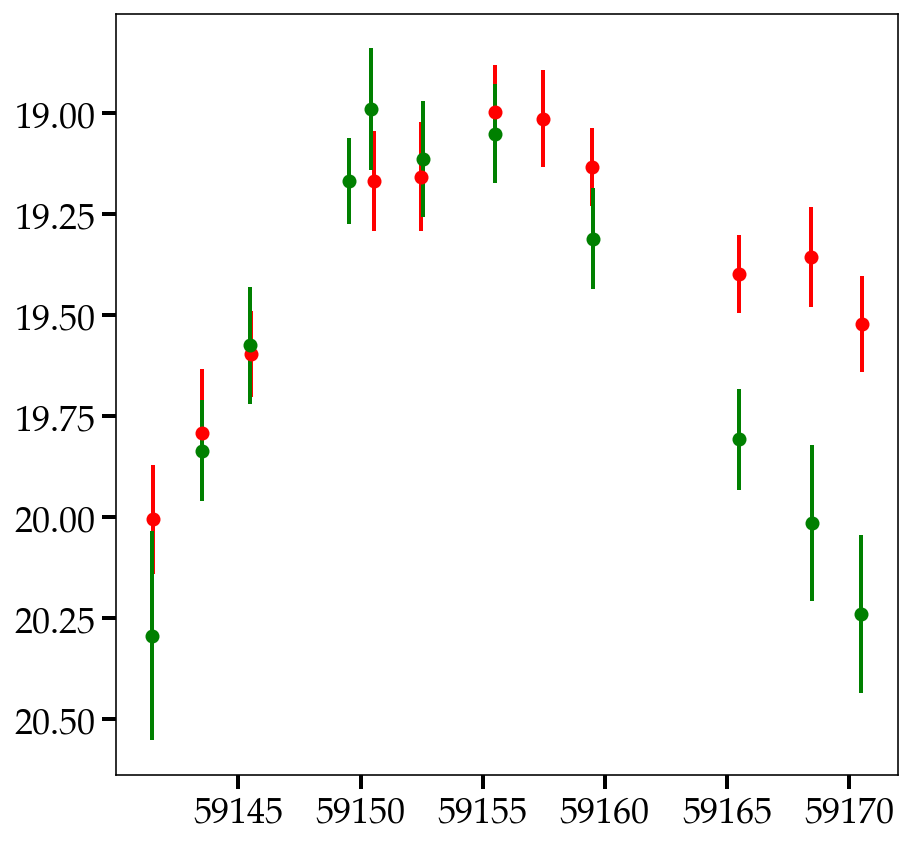

In [712]:
fig, ax = plt.subplots(figsize=(7,7))
plt.gca().invert_yaxis()

ax.errorbar(x=df_ref_r.ant_mjd, y=df_ref_r.ant_mag, yerr=df_ref_r.ant_magerr, fmt='o', c='r', 
            label=f'REF: {ztf_id_ref}')
ax.errorbar(x=df_ref_g.ant_mjd, y=df_ref_g.ant_mag, yerr=df_ref_g.ant_magerr, fmt='o', c='g')
#ax.text(df_ref_r.ant_mjd.iloc[-1]-df_ref_r.ant_mjd.iloc[0]+15, df_ref_r.ant_mag[-1]-df_ref_r.ant_mag.min(), s=f'Ref: {has_tns_ref}   {tns_cls_ref}')

# Extract LC features

In [713]:
def replace_magn_with_flux(s):
    if 'magnitude' in s:
        return s.replace('magnitudes', 'fluxes').replace('magnitude', 'flux')
    return f'{s} for flux light curve'

def create_base_features_class(
        magn_extractor,
        flux_extractor,
        bands=('R', 'g',),
    ):
    feature_names = ([f'{name}_magn' for name in magn_extractor.names]
                     + [f'{name}_flux' for name in flux_extractor.names])
    
    property_names = {band: [f'feature_{name}_{band}'.lower()
                             for name in feature_names]
                      for band in bands}
    
    features_count = len(feature_names)
    
    return feature_names, property_names, features_count


MAGN_EXTRACTOR = lc.Extractor(
    lc.Amplitude(),
    lc.AndersonDarlingNormal(),
    lc.BeyondNStd(1.0),
    lc.BeyondNStd(2.0),
    lc.Cusum(),
    lc.EtaE(),
    lc.InterPercentileRange(0.02),
    lc.InterPercentileRange(0.1),
    lc.InterPercentileRange(0.25),
    lc.Kurtosis(),
    lc.LinearFit(),
    lc.LinearTrend(),
    lc.MagnitudePercentageRatio(0.4, 0.05),
    lc.MagnitudePercentageRatio(0.2, 0.05),
    lc.MaximumSlope(),
    lc.Mean(),
    lc.MedianAbsoluteDeviation(),
    lc.PercentAmplitude(),
    lc.PercentDifferenceMagnitudePercentile(0.05),
    lc.PercentDifferenceMagnitudePercentile(0.1),
    lc.MedianBufferRangePercentage(0.1),
    lc.MedianBufferRangePercentage(0.2),
    lc.Periodogram(
        peaks=5,
        resolution=10.0,
        max_freq_factor=2.0,
        nyquist='average',
        fast=True,
        features=(
            lc.Amplitude(),
            lc.BeyondNStd(2.0),
            lc.BeyondNStd(3.0),
            lc.StandardDeviation(),
        ),
    ),
    lc.ReducedChi2(),
    lc.Skew(),
    lc.StandardDeviation(),
    lc.StetsonK(),
    lc.WeightedMean(),
)

FLUX_EXTRACTOR = lc.Extractor(
    lc.AndersonDarlingNormal(),
    lc.Cusum(),
    lc.EtaE(),
    lc.ExcessVariance(),
    lc.Kurtosis(),
    lc.MeanVariance(),
    lc.ReducedChi2(),
    lc.Skew(),
    lc.StetsonK(),
)

def remove_simultaneous_alerts(table):
    """Remove alert duplicates"""
    dt = np.diff(table['ant_mjd'], append=np.inf)
    return table[dt != 0]
    
def get_detections(photometry, band):
    """Extract clean light curve in given band from locus photometry"""
    band_lc = photometry[(photometry['ant_passband'] == band) & (~photometry['ant_mag'].isna())]
    idx = ~MaskedColumn(band_lc['ant_mag']).mask
    detections = remove_simultaneous_alerts(band_lc[idx])
    return detections

min_obs_count=4
cls_name='BaseFeatures'

lightcurve = ref_info.lightcurve
feature_names, property_names, features_count = create_base_features_class(MAGN_EXTRACTOR, FLUX_EXTRACTOR)


g_obs = list(get_detections(lightcurve, 'g').ant_mjd.values)
r_obs = list(get_detections(lightcurve, 'R').ant_mjd.values)
mjd_l = sorted(g_obs+r_obs)

lc_properties_d_l = []
len_det_counter_r,len_det_counter_g = 0,0

band_lc = lightcurve[(~lightcurve['ant_mag'].isna())]
idx = ~MaskedColumn(band_lc['ant_mag']).mask
all_detections = remove_simultaneous_alerts(band_lc[idx])
for ob, mjd in enumerate(mjd_l): # requires 4 obs
    # do time evolution of detections - in chunks
    
    detections_pb = all_detections[all_detections['ant_mjd'].values <= mjd]
    #print(detections)
    lc_properties_d={}
    for band, names in property_names.items():
        detections = detections_pb[detections_pb['ant_passband'] == band]
        
        # Ensure locus has >3 obs for calculation
        if (len(detections) < min_obs_count):
            continue
        #print(detections)
        
        t = detections['ant_mjd'].values
        m = detections['ant_mag'].values
        merr = detections['ant_magerr'].values
        flux = np.power(10.0, -0.4 * m)
        fluxerr = 0.5 * flux * (np.power(10.0, 0.4 * merr) - np.power(10.0, -0.4 * merr))

        magn_features = MAGN_EXTRACTOR(
            t,
            m,
            merr,
            fill_value=None,
        )
        flux_features = FLUX_EXTRACTOR(
            t,
            flux,
            fluxerr,
            fill_value=None,
        )

        # After successfully calculating features, set locus properties and tag
        lc_properties_d["obs_num"] = int(ob)
        lc_properties_d["mjd_cutoff"] = mjd
        lc_properties_d["ztf_object_id"] = ztf_id_ref
        #print(band, m)
        for name, value in zip(names, chain(magn_features, flux_features)):
            lc_properties_d[name] = value
            #if name == "feature_amplitude_magn_g": print(m, value, band)
        #print("%%%%%%%%")
    lc_properties_d_l.append(lc_properties_d)
print("Done!")

lc_properties_d_l = [d for d in lc_properties_d_l if d]

Done!


In [714]:
lc_properties_d

{'obs_num': 21,
 'mjd_cutoff': 59170.52946759993,
 'ztf_object_id': 'ZTF20aclgnds',
 'feature_amplitude_magn_r': 0.5041980743408203,
 'feature_anderson_darling_normal_magn_r': 0.36268064723245097,
 'feature_beyond_1_std_magn_r': 0.36363636363636365,
 'feature_beyond_2_std_magn_r': 0.0,
 'feature_cusum_magn_r': 0.39352828832490466,
 'feature_eta_e_magn_r': 0.34045320848510624,
 'feature_inter_percentile_range_2_magn_r': 1.0083961486816406,
 'feature_inter_percentile_range_10_magn_r': 0.8700255526166529,
 'feature_inter_percentile_range_25_magn_r': 0.43943119049072266,
 'feature_kurtosis_magn_r': -0.3689313738406601,
 'feature_linear_fit_slope_magn_r': -0.011159288896031664,
 'feature_linear_fit_slope_sigma_magn_r': 0.0038956616176460367,
 'feature_linear_fit_reduced_chi2_magn_r': 6.316798546510648,
 'feature_linear_trend_magn_r': -0.014020273308725817,
 'feature_linear_trend_sigma_magn_r': 0.009905317408070375,
 'feature_linear_trend_noise_magn_r': 0.3112042081281197,
 'feature_magnitud

In [715]:
lc_properties_d_l

[{'obs_num': 6,
  'mjd_cutoff': 59149.51124999998,
  'ztf_object_id': 'ZTF20aclgnds',
  'feature_amplitude_magn_g': 0.5625495910644531,
  'feature_anderson_darling_normal_magn_g': 0.06930359030433288,
  'feature_beyond_1_std_magn_g': 0.5,
  'feature_beyond_2_std_magn_g': 0.0,
  'feature_cusum_magn_g': 0.36719488090631547,
  'feature_eta_e_magn_g': 0.8367328679601871,
  'feature_inter_percentile_range_2_magn_g': 1.1250991821289062,
  'feature_inter_percentile_range_10_magn_g': 1.1250991821289062,
  'feature_inter_percentile_range_25_magn_g': 0.6928462982177734,
  'feature_kurtosis_magn_g': 0.06820546466777166,
  'feature_linear_fit_slope_magn_g': -0.11950855480478284,
  'feature_linear_fit_slope_sigma_magn_g': 0.023669595044599933,
  'feature_linear_fit_reduced_chi2_magn_g': 0.3743115508898929,
  'feature_linear_trend_magn_g': -0.13473146811715042,
  'feature_linear_trend_sigma_magn_g': 0.019344499225914493,
  'feature_linear_trend_noise_magn_g': 0.1149624894319997,
  'feature_magnitude

In [716]:
feats = ['feature_amplitude_magn_r',
 'feature_anderson_darling_normal_magn_r',
 'feature_beyond_1_std_magn_r',
 'feature_beyond_2_std_magn_r',
 'feature_cusum_magn_r',
 'feature_inter_percentile_range_2_magn_r',
 'feature_inter_percentile_range_10_magn_r',
 'feature_inter_percentile_range_25_magn_r',
 'feature_kurtosis_magn_r',
 'feature_linear_fit_slope_magn_r',
 'feature_linear_fit_slope_sigma_magn_r',
 'feature_magnitude_percentage_ratio_40_5_magn_r',
 'feature_magnitude_percentage_ratio_20_5_magn_r',
 'feature_mean_magn_r',
 'feature_median_absolute_deviation_magn_r',
 'feature_percent_amplitude_magn_r',
 'feature_median_buffer_range_percentage_10_magn_r',
 'feature_median_buffer_range_percentage_20_magn_r',
 'feature_percent_difference_magnitude_percentile_5_magn_r',
 'feature_percent_difference_magnitude_percentile_10_magn_r',
 'feature_skew_magn_r',
 'feature_standard_deviation_magn_r',
 'feature_stetson_k_magn_r',
 'feature_weighted_mean_magn_r',
 'feature_anderson_darling_normal_flux_r',
 'feature_cusum_flux_r',
 'feature_excess_variance_flux_r',
 'feature_kurtosis_flux_r',
 'feature_mean_variance_flux_r',
 'feature_skew_flux_r',
 'feature_stetson_k_flux_r',
 'feature_amplitude_magn_g',
 'feature_anderson_darling_normal_magn_g',
 'feature_beyond_1_std_magn_g',
 'feature_beyond_2_std_magn_g',
 'feature_cusum_magn_g',
 'feature_inter_percentile_range_2_magn_g',
 'feature_inter_percentile_range_10_magn_g',
 'feature_inter_percentile_range_25_magn_g',
 'feature_kurtosis_magn_g',
 'feature_linear_fit_slope_magn_g',
 'feature_linear_fit_slope_sigma_magn_g',
 'feature_magnitude_percentage_ratio_40_5_magn_g',
 'feature_magnitude_percentage_ratio_20_5_magn_g',
 'feature_mean_magn_g',
 'feature_median_absolute_deviation_magn_g',
 'feature_median_buffer_range_percentage_10_magn_g',
 'feature_median_buffer_range_percentage_20_magn_g',
 'feature_percent_amplitude_magn_g',
 'feature_percent_difference_magnitude_percentile_5_magn_g',
 'feature_percent_difference_magnitude_percentile_10_magn_g',
 'feature_skew_magn_g',
 'feature_standard_deviation_magn_g',
 'feature_stetson_k_magn_g',
 'feature_weighted_mean_magn_g',
 'feature_anderson_darling_normal_flux_g',
 'feature_cusum_flux_g',
 'feature_excess_variance_flux_g',
 'feature_kurtosis_flux_g',
 'feature_mean_variance_flux_g',
 'feature_skew_flux_g',
 'feature_stetson_k_flux_g']

drop_feat_cols = ['feature_eta_e_magn_r',
                 'feature_linear_fit_reduced_chi2_magn_r', 
                 'feature_linear_trend_magn_r', # cadence removal
                 'feature_linear_trend_sigma_magn_r',  # cadence removal
                 'feature_linear_trend_noise_magn_r',  # cadence removal
                 'feature_maximum_slope_magn_r',
                 'feature_period_0_magn_r',  # should be negated
                 'feature_period_s_to_n_0_magn_r', # cadence removal
                 'feature_period_1_magn_r', 
                 'feature_period_s_to_n_1_magn_r', # cadence removal
                 'feature_period_2_magn_r', 
                 'feature_period_s_to_n_2_magn_r', # cadence removal
                 'feature_period_3_magn_r', 
                 'feature_period_s_to_n_3_magn_r', # cadence removal
                 'feature_period_4_magn_r', 
                 'feature_period_s_to_n_4_magn_r', # cadence removal
                 'feature_periodogram_amplitude_magn_r',
                 'feature_periodogram_beyond_2_std_magn_r',  # cadence removal
                 'feature_periodogram_beyond_3_std_magn_r',  # cadence removal
                 'feature_periodogram_standard_deviation_magn_r',   # cadence removal
                 'feature_chi2_magn_r',
                 'feature_eta_e_flux_r', 
                 'feature_chi2_flux_r', 
                 'feature_eta_e_magn_g',
                 'feature_linear_fit_reduced_chi2_magn_g', 
                 'feature_linear_trend_magn_g', # cadence removal
                 'feature_linear_trend_sigma_magn_g',  # cadence removal
                 'feature_linear_trend_noise_magn_g',
                 'feature_maximum_slope_magn_g', 
                 'feature_period_0_magn_g',  # should be negated
                 'feature_period_s_to_n_0_magn_g', # cadence removal
                 'feature_period_1_magn_g', 
                 'feature_period_s_to_n_1_magn_g', # cadence removal
                 'feature_period_2_magn_g', 
                 'feature_period_s_to_n_2_magn_g', # cadence removal
                 'feature_period_3_magn_g', 
                 'feature_period_s_to_n_3_magn_g', # cadence removal
                 'feature_period_4_magn_g', 
                 'feature_period_s_to_n_4_magn_g', # cadence removal
                 'feature_periodogram_amplitude_magn_g',
                 'feature_periodogram_beyond_2_std_magn_g',  # cadence removal
                 'feature_periodogram_beyond_3_std_magn_g', # cadence removal
                 'feature_periodogram_standard_deviation_magn_g',  # cadence removal
                 'feature_chi2_magn_g',
                 'feature_eta_e_flux_g', 
                 'feature_chi2_flux_g',]

In [717]:
len(feats)

62

In [718]:
lc_properties_df = pd.DataFrame(lc_properties_d_l)
#lc_properties_df.set_index('ztf_object_id')

#lc_properties_df = lc_properties_df.drop(columns=drop_feat_cols)
#lc_properties_df = lc_properties_df.set_index('ztf_object_id')
lc_properties_df

,obs_num,mjd_cutoff,ztf_object_id,feature_amplitude_magn_g,feature_anderson_darling_normal_magn_g,feature_beyond_1_std_magn_g,feature_beyond_2_std_magn_g,feature_cusum_magn_g,feature_eta_e_magn_g,feature_inter_percentile_range_2_magn_g,...,feature_weighted_mean_magn_r,feature_anderson_darling_normal_flux_r,feature_cusum_flux_r,feature_eta_e_flux_r,feature_excess_variance_flux_r,feature_kurtosis_flux_r,feature_mean_variance_flux_r,feature_chi2_flux_r,feature_skew_flux_r,feature_stetson_k_flux_r
0,6,59149.511250,ZTF20aclgnds,0.562550,0.069304,0.500000,0.0,0.367195,0.836733,1.125099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,59150.432847,ZTF20aclgnds,0.651689,0.142779,0.400000,0.0,0.377660,0.530212,1.303377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,59150.530405,ZTF20aclgnds,0.651689,0.142779,0.400000,0.0,0.377660,0.530212,1.303377,...,19.605029,0.122297,0.348471,0.541998,0.104676,1.544123,0.346242,6.440929,1.230006,0.846750
3,9,59152.485660,ZTF20aclgnds,0.651689,0.142779,0.400000,0.0,0.377660,0.530212,1.303377,...,19.523781,0.290152,0.418387,0.291839,0.099398,-2.775628,0.339460,7.263210,0.226320,0.880646
4,10,59152.535058,ZTF20aclgnds,0.651689,0.290615,0.333333,0.0,0.402558,0.458617,1.303377,...,19.523781,0.290152,0.418387,0.291839,0.099398,-2.775628,0.339460,7.263210,0.226320,0.880646
5,11,59155.493912,ZTF20aclgnds,0.651689,0.290615,0.333333,0.0,0.402558,0.458617,1.303377,...,19.421220,0.310492,0.433108,0.243654,0.107908,-2.180244,0.350581,9.175299,-0.026388,0.872296
6,12,59155.511759,ZTF20aclgnds,0.651689,0.492115,0.142857,0.0,0.410630,0.453740,1.303377,...,19.421220,0.310492,0.433108,0.243654,0.107908,-2.180244,0.350581,9.175299,-0.026388,0.872296
7,13,59157.462627,ZTF20aclgnds,0.651689,0.492115,0.142857,0.0,0.410630,0.453740,1.303377,...,19.357947,0.434019,0.436383,0.178197,0.098768,-1.993907,0.336714,9.848283,-0.355551,0.911299
8,14,59159.464861,ZTF20aclgnds,0.651689,0.492115,0.142857,0.0,0.410630,0.453740,1.303377,...,19.314354,0.577658,0.431483,0.202207,0.083686,-1.512171,0.311807,10.068921,-0.605340,0.933373
9,15,59159.511690,ZTF20aclgnds,0.651689,0.511843,0.125000,0.0,0.398881,0.564524,1.303377,...,19.314354,0.577658,0.431483,0.202207,0.083686,-1.512171,0.311807,10.068921,-0.605340,0.933373


lc_properties_df = pd.DataFrame.from_dict(lc_properties_d, orient='index').T
#lc_properties_df.set_index('ztf_object_id')

lc_properties_df = lc_properties_df.drop(columns=drop_feat_cols)
lc_properties_df.set_index('ztf_object_id')

# Get GHOST features

In [719]:
%%time

import astro_ghost
from astro_ghost.ghostHelperFunctions import getTransientHosts, getGHOST
from astropy.coordinates import SkyCoord
from astropy import units as u
from datetime import datetime
import tempfile

# Throw RA/DEC into ghost with just DLR method, gentle starcut
# Sets environ var to find ghost.csv
os.environ['GHOST_PATH'] = './host_info'
# Then don't use getGHOST(real=True, verbose=verbose)
getGHOST(real=True,verbose=False)

ra,dec=np.mean(df_ref.ant_ra),np.mean(df_ref.ant_dec)
print(ra,dec)

snName=[ztf_id_ref, ztf_id_ref]
snCoord = [SkyCoord(ra*u.deg, dec*u.deg, frame='icrs'), SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')]
print(snCoord)
with tempfile.TemporaryDirectory() as tmp:
    hosts = getTransientHosts(snName=snName, snCoord=snCoord, verbose=0, starcut='gentle', ascentMatch=False, savepath=tmp)
    # Save
    #hosts.to_csv(f'../loci_dbs/alerce_cut/dataset_bank_hosts_start_idx-end_idx={start_idx}-{end_idx}.csv.gz', compression='gzip', index=False)
    #print("Saved!\n#############")
if len(hosts) > 1:
    hosts = pd.DataFrame(hosts.loc[0]).T
    
hosts

GHOST database already exists in the install path!
139.33892297272726 33.88877446818182
[<SkyCoord (ICRS): (ra, dec) in deg
    (139.33892297, 33.88877447)>, <SkyCoord (ICRS): (ra, dec) in deg
    (139.33892297, 33.88877447)>]
Finding northern sources with Pan-starrs...
Found matches for 50.0% of events.
CPU times: user 2.72 s, sys: 218 ms, total: 2.93 s
Wall time: 6.9 s


,objName,objAltName1,objAltName2,objAltName3,objID,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,...,yApMag_yKronMag,7DCD,hasSimbad,class,dist/DLR,dist,TransientClass,TransientName,TransientRA,TransientDEC
0,PSO J091721.197+335317.892,NaN,NaN,NaN,148661393384266604,1048281000134780,214104119840382,0,16488487215495,14866,...,0.499899,18.244854,0,False,0.344077,2.426751,NaN\nNaN,ZTF20aclgnds\nZTF20aclgnds,139.338923,33.888774


In [720]:
print(f'http://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos={hosts.raMean.values[0]}+{hosts.decMean.values[0]}&filter=color')

http://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos=139.33832939+33.88831446&filter=color


In [721]:
# Define the label array
label_arr = np.array(['None', 'SLSN-II', 'SN II', 'SN IIP', 'SN IIb', 'SN IIn', 'SN Ia',
                     'SN Ia-91T-like', 'SN Ib', 'SN Ic', 'SN Ic-BL', 'TDE'])

# Define the spectroscopic class
spec_class = spec_class

# Find the index of the spectroscopic class in the label array
class_index = np.where(label_arr == spec_class)[0]

# Create a one-hot encoded array with all zeros
onehot_array = np.zeros(len(label_arr), dtype=float)

# Set the corresponding index to 1
onehot_array[class_index] = 1

# Reshape the array to have a shape of (1, num_classes)
onehot_array = onehot_array.reshape(1, -1)

# Print the one-hot encoded label
print(onehot_array)


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [722]:
onehot_df = pd.DataFrame(np.array(onehot_array, dtype=float), columns=label_arr)
onehot_df = pd.concat([onehot_df] * len(lc_properties_df), ignore_index=True)
onehot_df

,None,SLSN-II,SN II,SN IIP,SN IIb,SN IIn,SN Ia,SN Ia-91T-like,SN Ib,SN Ic,SN Ic-BL,TDE
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [723]:
hosts_df = hosts[feature_names_hostgal]
hosts_df = pd.concat([hosts_df] * len(lc_properties_df), ignore_index=True)

lc_and_hosts_df = pd.concat([lc_properties_df, hosts_df, onehot_df], axis=1)
lc_and_hosts_df = lc_and_hosts_df.set_index('ztf_object_id')
lc_and_hosts_df.to_csv(f'{df_path}/{lc_and_hosts_df.index[0]}_timeseries.csv')
lc_and_hosts_df

,obs_num,mjd_cutoff,feature_amplitude_magn_g,feature_anderson_darling_normal_magn_g,feature_beyond_1_std_magn_g,feature_beyond_2_std_magn_g,feature_cusum_magn_g,feature_eta_e_magn_g,feature_inter_percentile_range_2_magn_g,feature_inter_percentile_range_10_magn_g,...,SN II,SN IIP,SN IIb,SN IIn,SN Ia,SN Ia-91T-like,SN Ib,SN Ic,SN Ic-BL,TDE
ztf_object_id,,,,,,,,,,,,,,,,,,,,,
ZTF20aclgnds,6,59149.511250,0.562550,0.069304,0.500000,0.0,0.367195,0.836733,1.125099,1.125099,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZTF20aclgnds,7,59150.432847,0.651689,0.142779,0.400000,0.0,0.377660,0.530212,1.303377,1.303377,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZTF20aclgnds,8,59150.530405,0.651689,0.142779,0.400000,0.0,0.377660,0.530212,1.303377,1.303377,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZTF20aclgnds,9,59152.485660,0.651689,0.142779,0.400000,0.0,0.377660,0.530212,1.303377,1.303377,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZTF20aclgnds,10,59152.535058,0.651689,0.290615,0.333333,0.0,0.402558,0.458617,1.303377,1.245226,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZTF20aclgnds,11,59155.493912,0.651689,0.290615,0.333333,0.0,0.402558,0.458617,1.303377,1.245226,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZTF20aclgnds,12,59155.511759,0.651689,0.492115,0.142857,0.0,0.410630,0.453740,1.303377,1.199576,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZTF20aclgnds,13,59157.462627,0.651689,0.492115,0.142857,0.0,0.410630,0.453740,1.303377,1.199576,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ZTF20aclgnds,14,59159.464861,0.651689,0.492115,0.142857,0.0,0.410630,0.453740,1.303377,1.199576,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [724]:
for f, v in zip(lc_and_hosts_df.columns, lc_and_hosts_df.iloc[-1, :].values):
    print(f,v)

obs_num 21.0
mjd_cutoff 59170.52946759993
feature_amplitude_magn_g 0.6516885757446289
feature_anderson_darling_normal_magn_g 0.4461019236192039
feature_beyond_1_std_magn_g 0.36363636363636365
feature_beyond_2_std_magn_g 0.0
feature_cusum_magn_g 0.4291067566242199
feature_eta_e_magn_g 0.5316052797243762
feature_inter_percentile_range_2_magn_g 1.3033771514892578
feature_inter_percentile_range_10_magn_g 1.2345706720018406
feature_inter_percentile_range_25_magn_g 0.8422942161560023
feature_kurtosis_magn_g -1.581861344486283
feature_linear_fit_slope_magn_g 0.012202505465547716
feature_linear_fit_slope_sigma_magn_g 0.0050915087314198585
feature_linear_fit_reduced_chi2_magn_g 9.067106742881636
feature_linear_trend_magn_g 0.010377147687128298
feature_linear_trend_sigma_magn_g 0.01561741870274263
feature_linear_trend_noise_magn_g 0.4975607412058675
feature_magnitude_percentage_ratio_40_5_magn_g 0.3963228330128345
feature_magnitude_percentage_ratio_20_5_magn_g 0.7607019111141418
feature_maximum_

hosts_df = hosts[feature_names_hostgal]

lc_and_hosts_df = pd.concat([lc_properties_df, hosts_df, onehot_df], axis=1)
lc_and_hosts_df = lc_and_hosts_df.set_index('ztf_object_id')
lc_and_hosts_df.to_csv(f'{df_path}/{lc_and_hosts_df.index[0]}.csv')
lc_and_hosts_df

In [725]:
lc_and_hosts_df.index[0]

'ZTF20aclgnds'